### Raw signal

C:\Users\hpl886\Documents\Exjobb\data\extracted\old\S-C_Close_Comp.txt_III,C,0.68_20090605000000-20210611160000.csv


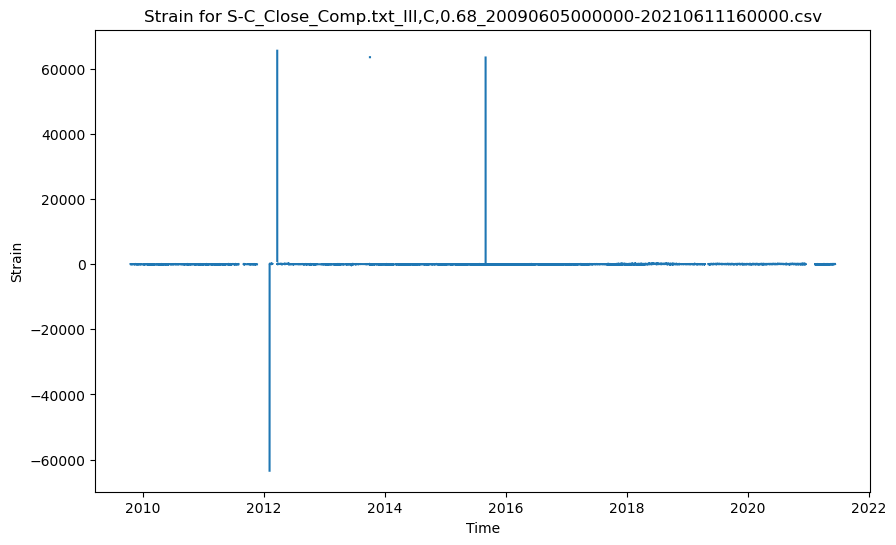

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path

# Add the root project directory to the Python path
project_root = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(project_root))

from configs.path_config import EXTRACTED_DATA_DIR

base_dir = EXTRACTED_DATA_DIR
file = 'S-C_Close_Comp.txt_III,C,0.68_20090605000000-20210611160000.csv'
path = Path(base_dir) / 'old' / file

print(path)

df = pd.read_csv(path, parse_dates=['Time'])

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

### Cleaning zeros and extreme outliers

160 zeros to replace with NaN


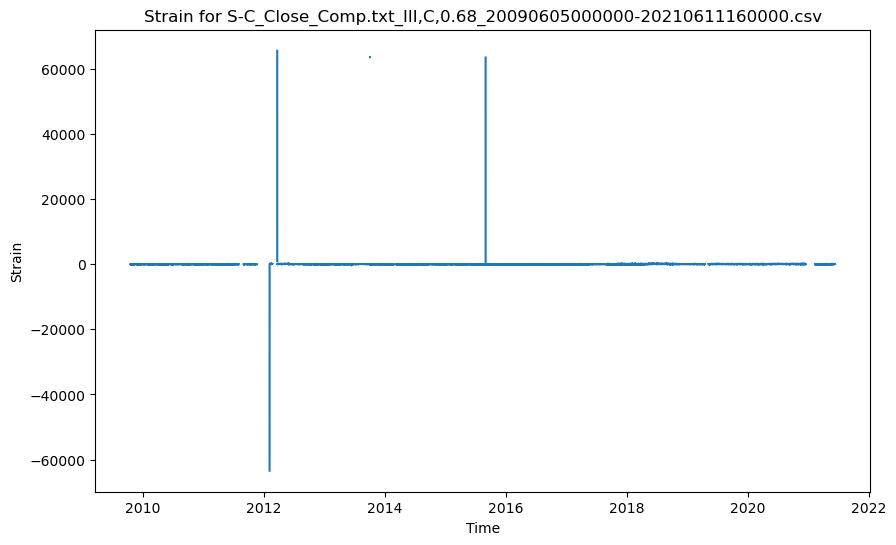

In [17]:
#Find values of strain that are exactly zero
df_zero = df[df["Strain"] == 0]
print(f'{df_zero.shape[0]} zeros to replace with NaN')


# Remove rows with strain values of zero by replacing with NaN
df = df.copy()
df.loc[df["Strain"] == 0, "Strain"] = np.nan

df_zero = df[df["Strain"] == 0]

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

Lower bound = -136.0 Extreme lower bound = -247.0
Upper bound = 160.0 Extreme upper bound = 271.0


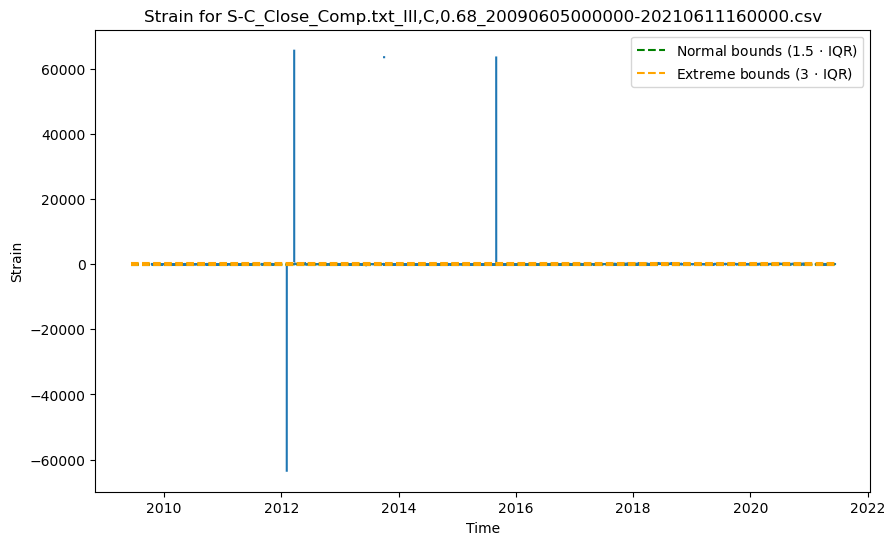

Number of mild outliers (1.5 × IQR): 76
Number of extreme outliers (3 × IQR): 14


In [18]:
# Compute IQR
Q1 = df['Strain'].quantile(0.25)  # 25th percentile
Q3 = df['Strain'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for extreme outliers
lower_bound = Q1 - 1.5 * IQR
lower_bound_extreme = Q1 - 3 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound_extreme = Q3 + 3 * IQR
print(f'Lower bound = {lower_bound} Extreme lower bound = {lower_bound_extreme}')
print(f'Upper bound = {upper_bound} Extreme upper bound = {upper_bound_extreme}')


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.hlines(y=[lower_bound, upper_bound], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='green', linestyles='dashed', label=r'Normal bounds (1.5 $\cdot$ IQR)')
plt.hlines(y=[lower_bound_extreme, upper_bound_extreme], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='orange', linestyles='dashed', label=r'Extreme bounds (3 $\cdot$ IQR)')
plt.legend()
plt.show()

mild_outliers = df[(df['Strain'] < lower_bound) | (df['Strain'] > upper_bound)]
mild_outlier_indices = mild_outliers.index  # Save the indices of mild outliers
num_mild_outliers = mild_outliers.shape[0]

# Count extreme outliers (outside 3 * IQR)
extreme_outliers = df[(df['Strain'] < lower_bound_extreme) | (df['Strain'] > upper_bound_extreme)]
extreme_outlier_indices = extreme_outliers.index  # Save the indices of extreme outliers
num_extreme_outliers = extreme_outliers.shape[0]

# Print results
print(f'Number of mild outliers (1.5 × IQR): {num_mild_outliers}')
print(f'Number of extreme outliers (3 × IQR): {num_extreme_outliers}')

Number of outliers replaced with NaN: 14


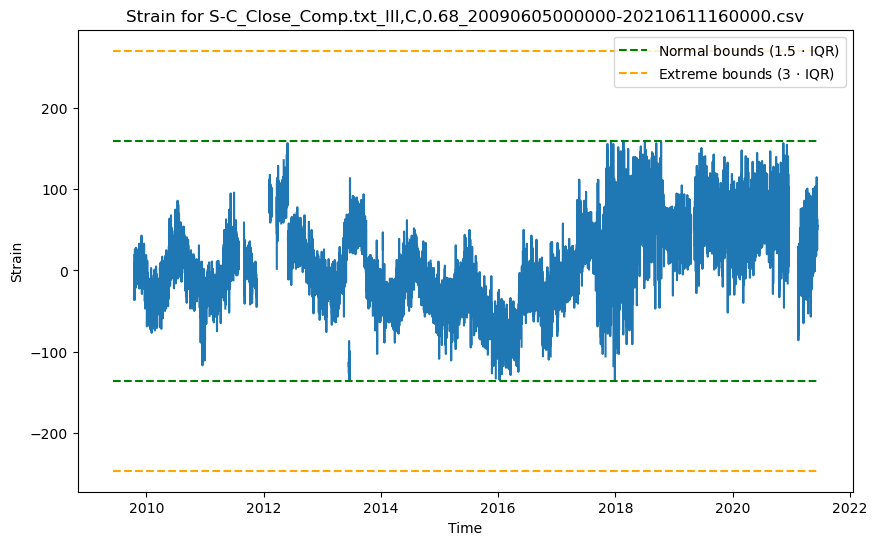

In [19]:
# Replace extreme outliers with NaN
df.loc[mild_outlier_indices, 'Strain'] = np.nan  # Using np.nan to replace the outlier values
print(f'Number of outliers replaced with NaN: {len(extreme_outlier_indices)}')

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.hlines(y=[lower_bound, upper_bound], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='green', linestyles='dashed', label=r'Normal bounds (1.5 $\cdot$ IQR)')
plt.hlines(y=[lower_bound_extreme, upper_bound_extreme], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='orange', linestyles='dashed', label=r'Extreme bounds (3 $\cdot$ IQR)')
plt.legend()
plt.show()

### Shifts and scales
Handles the shift in equilibrium as well as the changed scales after each interruption

In [20]:
# import shift_segments #shift_segments.py

# shift_segments.shift_scale(df)

# plt.figure(figsize=(50, 6))
# plt.plot(df['Time'], df['Strain'], linestyle='-')
# plt.xlabel('Time')
# plt.ylabel('Strain (scaled)')
# plt.title(f'Shifted and scaled strain for \n{file}')
# plt.legend()
# plt.show()

### Handeling missing values

Lenght: 801, Start Time: 2009-06-05 00:00:00, End Time: 2009-10-16 08:00:00
Lenght: 421, Start Time: 2011-11-25 12:00:00, End Time: 2012-02-03 12:00:00
Lenght: 340, Start Time: 2020-12-16 16:00:00, End Time: 2021-02-11 04:00:00
Lenght: 188, Start Time: 2011-07-31 12:00:00, End Time: 2011-08-31 16:00:00
Lenght: 181, Start Time: 2012-02-21 08:00:00, End Time: 2012-03-22 08:00:00
Lenght: 127, Start Time: 2019-04-17 12:00:00, End Time: 2019-05-08 12:00:00
Lenght: 66, Start Time: 2013-06-03 12:00:00, End Time: 2013-06-14 08:00:00
Lenght: 44, Start Time: 2020-08-27 04:00:00, End Time: 2020-09-03 08:00:00
Lenght: 42, Start Time: 2014-11-06 12:00:00, End Time: 2014-11-13 08:00:00
Lenght: 33, Start Time: 2011-11-19 20:00:00, End Time: 2011-11-25 04:00:00
Lenght: 29, Start Time: 2016-05-28 20:00:00, End Time: 2016-06-02 12:00:00
Lenght: 27, Start Time: 2011-10-22 04:00:00, End Time: 2011-10-26 12:00:00
Lenght: 25, Start Time: 2020-08-17 12:00:00, End Time: 2020-08-21 12:00:00
Lenght: 22, Start T

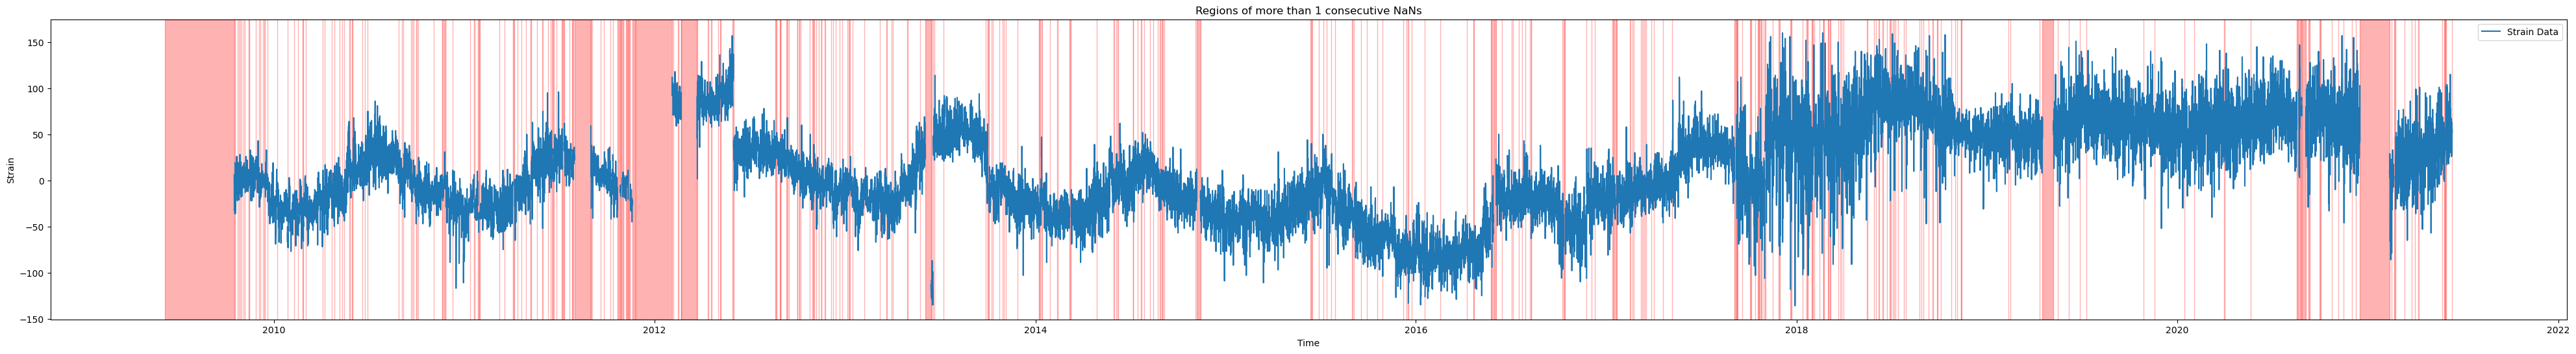

In [21]:
#indentify the regions of missing values
from src.processing import nan_regions #nan_regions.py

thresholds = [1] # Choose the threshold(s) for consecutive NaNs
consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
for threshold in thresholds:
    # Plot the data
    plt.figure(figsize=(50, 6))
    plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

    # Labels and title
    plt.xlabel('Time')
    plt.ylabel('Strain')
    plt.title(f'Regions of more than {threshold} consecutive NaNs')
    plt.legend()

    # Shade regions with more than x consecutive NaNs
    for start, end in consecutive_nan_regions:
        plt.axvspan(df['Time'].loc[start], df['Time'].loc[end], color='red', alpha=0.3)
    
    for column in nan_regions_sorted:
        print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
    plt.show()

In [22]:
from src.processing import interpolate_nan #interpolate_nan.py

interpolate_threshold = 6
df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)
df = df_filled

Region to fill: 
   Length: 6 steps
   Start Time: 2011-01-11 12:00:00
   End Time: 2011-01-12 08:00:00
3512
Both indices (3512, 3519) are valid -> interpolate 6 steps
target: 3513
Interpolated value at index 3513: -25.571428571428573
target: 3514
Interpolated value at index 3514: -27.142857142857142
target: 3515
Interpolated value at index 3515: -28.714285714285715
target: 3516
Interpolated value at index 3516: -30.285714285714285
target: 3517
Interpolated value at index 3517: -31.857142857142858
target: 3518
Interpolated value at index 3518: -33.42857142857143
Start value: -24.0
End value: -35.0 

Region to fill: 
   Length: 6 steps
   Start Time: 2011-07-21 12:00:00
   End Time: 2011-07-22 08:00:00
4658
Both indices (4658, 4665) are valid -> interpolate 6 steps
target: 4659
Interpolated value at index 4659: 13.285714285714285
target: 4660
Interpolated value at index 4660: 10.571428571428571
target: 4661
Interpolated value at index 4661: 7.857142857142858
target: 4662
Interpolated va

In [23]:
# import nan_regions #nan_regions.py
# thresholds = [interpolate_threshold] # Choose the threshold(s) for consecutive NaNs

# for threshold in thresholds:
#     consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
#     # Plot the data
#     plt.figure(figsize=(50, 6))
#     plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

#     # Shade regions with more than x consecutive NaNs
#     for start, end in consecutive_nan_regions:
#         plt.axvspan(df['Time'].loc[start], df['Time'].loc[end], color='red', alpha=0.3)

#     # Labels and title
#     plt.xlabel('Time')
#     plt.ylabel('Strain')
#     plt.title(f'Regions of more than {threshold} consecutive NaNs \n{file}')
#     plt.legend()
    
#     for column in nan_regions_sorted:
#         print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
#     plt.show()
import plotly.graph_objects as go
from src.processing import nan_regions #nan_regions.py
thresholds = [interpolate_threshold] # Choose the threshold(s) for consecutive NaNs

for threshold in thresholds:
    consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
    # Plot the data
    
    # Create figure
    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

    # Shade regions with NaNs
    for start, end in consecutive_nan_regions:
        fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='red', opacity=0.3, line_width=0)

    # Labels and title
    fig.update_layout(
        title=f'Regions of more than {threshold} consecutive NaNs \n{file}',
        xaxis_title='Time',
        yaxis_title='Strain',
        # Enable pan, zoom, and reset tools
        dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
        xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
    )

    # Show figure
    fig.show()  
    

In [24]:
def valid_regions(df,threshold_valid):
    valid_indices = df[df['Strain'].notna()].index.tolist()
    consecutive_valid_regions = []
    start_idx = None

    for i in range(len(valid_indices)):
        if start_idx is None:
            start_idx = valid_indices[i]
        if i == len(valid_indices) - 1 or valid_indices[i] + 1 != valid_indices[i + 1]:
            end_idx = valid_indices[i]
            if (end_idx - start_idx + 1) >= threshold_valid:  # Threshold for region length
                consecutive_valid_regions.append((start_idx, end_idx))
            start_idx = None

    valid_regions_sorted = [
            (start, end, df.loc[start, 'Time'], df.loc[end, 'Time'], end - start + 1)
            for start, end in consecutive_valid_regions
        ]
    
    valid_regions_sorted.sort(key=lambda x: x[4], reverse=True)

    return consecutive_valid_regions
        
        
threshold_valid = 400
consecutive_valid_regions = valid_regions(df,threshold_valid)

fig = go.Figure()

    # Add traces
fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# Shade regions with NaNs
for start, end in consecutive_valid_regions:
    fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='green', opacity=0.3, line_width=0)

# Labels and title
fig.update_layout(
    title=f'Consecutive regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps) <br> {file}',
    xaxis_title='Time',
    yaxis_title='Strain',
    # Enable pan, zoom, and reset tools
    # dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
    xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
)

# Show figure
fig.show()

In [25]:
files = ['S-C_Close_Comp.txt_III,C,0.68_20090605000000-20210611160000.csv',
         'N-B_Far_Comp.txt_N13, B, 0.03_20090605000000-20210611160000.csv'     
]

# folder = '../timeseries_csv/'
dfs = {}

for i, filename in enumerate(files):
    file_path = Path(base_dir) / 'old' / file
    try:
        dfs[f"df{i+1}"] = pd.read_csv(file_path, parse_dates=['Time'])
        print(f"Läst in: {filename} som dfs['df{i+1}']")
    except FileNotFoundError:
        print(f"Filen hittades inte: {file_path}")

Läst in: S-C_Close_Comp.txt_III,C,0.68_20090605000000-20210611160000.csv som dfs['df1']
Läst in: N-B_Far_Comp.txt_N13, B, 0.03_20090605000000-20210611160000.csv som dfs['df2']


In [26]:
from src.processing import preprocessing

interpolate_threshold = 5
dfs['df1'] = preprocessing.clean_zeros_outliers_interpolate(dfs['df1'], interpolate_threshold)
dfs['df2'] = preprocessing.clean_zeros_outliers_interpolate(dfs['df2'], interpolate_threshold)

160 zeros to replace with NaN
Number of mild outliers (1.5 × IQR): 76
Number of extreme outliers (3 × IQR): 14
Number of outliers replaced with NaN: 76
Region to fill: 
   Length: 5 steps
   Start Time: 2011-01-27 16:00:00
   End Time: 2011-01-28 08:00:00
3609
Both indices (3609, 3615) are valid -> interpolate 5 steps
target: 3610
Interpolated value at index 3610: -60.166666666666664
target: 3611
Interpolated value at index 3611: -59.333333333333336
target: 3612
Interpolated value at index 3612: -58.5
target: 3613
Interpolated value at index 3613: -57.666666666666664
target: 3614
Interpolated value at index 3614: -56.833333333333336
Start value: -61.0
End value: -56.0 

Region to fill: 
   Length: 5 steps
   Start Time: 2014-01-13 12:00:00
   End Time: 2014-01-14 04:00:00
10100
Both indices (10100, 10106) are valid -> interpolate 5 steps
target: 10101
Interpolated value at index 10101: -12.166666666666666
target: 10102
Interpolated value at index 10102: -15.333333333333332
target: 1010

In [27]:
import plotly.graph_objects as go

threshold_valid = 300  # Apply threshold after finding overlapping regions
consecutive_regions_dict = {}  # Store consecutive valid regions for each dataset

# Compute valid regions for each dataset
for name, df in dfs.items():
    consecutive_valid_regions = valid_regions(df, threshold_valid)
    consecutive_regions_dict[name] = consecutive_valid_regions

def find_overlapping_regions(*series_regions):
    """
    Find overlapping regions where all time series overlap.
    
    Args:
        *series_regions: Variable number of lists with (start, end) tuples for each time series.
        
    Returns:
        overlapping_regions: List of (start, end) tuples where all series overlap.
    """
    if not series_regions:
        return []

    overlapping_regions = series_regions[0]  # Start with the first series' valid regions

    for regions in series_regions[1:]:
        new_overlapping = []
        for s1, e1 in overlapping_regions:
            for s2, e2 in regions:
                # Compute overlap between two regions
                start_overlap = max(s1, s2)
                end_overlap = min(e1, e2)

                # If a valid overlap exists, store it
                if start_overlap <= end_overlap:
                    new_overlapping.append((start_overlap, end_overlap))

        overlapping_regions = new_overlapping  # Update overlapping regions

        if not overlapping_regions:  # Stop if no overlapping region remains
            break

    return overlapping_regions

# Compute overlapping regions across all datasets
overlapping_regions = find_overlapping_regions(*consecutive_regions_dict.values())

# **Apply threshold on overlapping regions**
filtered_overlapping_regions = [
    (start, end) for start, end in overlapping_regions if (end - start) >= threshold_valid
]

filtered_overlapping_regions = np.array(filtered_overlapping_regions)  # Convert list to NumPy array
filtered_overlapping_regions_length = filtered_overlapping_regions[:, 1] - filtered_overlapping_regions[:, 0]

print(f'Found {len(filtered_overlapping_regions_length)} overlapping regions with the lengths: {filtered_overlapping_regions_length}')

# Create figure
fig = go.Figure()
fig.update_layout(width=1600, height=600)  # Set figure size

# Add each time series to the figure
for name, df in dfs.items():
    fig.add_trace(go.Scatter(
        x=df['Time'], 
        y=df['Strain'], 
        mode='lines', 
        name=name  # Dynamic name
    ))

# Highlight the filtered overlapping regions
for start, end in filtered_overlapping_regions:
    fig.add_vrect(
        x0=dfs['df1']['Time'].loc[start],  # Use first df for time axis reference
        x1=dfs['df1']['Time'].loc[end], 
        fillcolor='green', 
        opacity=0.3, 
        line_width=0
    )

# Layout settings
fig.update_layout(
    title=f'Overlapping regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps)',
    xaxis_title='Time',
    yaxis_title='Strain',
    xaxis_rangeslider_visible=True
)

# Show figure
fig.show()

Found 24 overlapping regions with the lengths: [ 611  561 1348  374  359  307  629 1667  652  575  344 1445 1546 1587
  778  580 1354  337 1247 1205 1960  833  449  569]


In [28]:
# fig = go.Figure()

#         # Add traces
# fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# # Shade regions with NaNs
# for start, end in overlapping_regions:
#     fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='green', opacity=0.3, line_width=0)

# # Labels and title
# fig.update_layout(
#     title=f'Consecutive regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps) <br> {file}',
#     xaxis_title='Time',
#     yaxis_title='Strain',
#     # Enable pan, zoom, and reset tools
#     # dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
#     xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
# )

#     # Show figure
# fig.show()